# Appendix B
#### Nicetak

In [4]:
import datetime; datetime.datetime.now().strftime('%B %-d, %Y')

'April 23, 2022'

In [5]:
 %load_ext autoreload
 %autoreload 2

In [6]:
import torch
torch.manual_seed(1234)
from mnist import Mnist

import numpy as np
from numba import jit, int64, float64, prange, get_num_threads

import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## B.1 Generalization
>- Install Keras.
>- Go to the Keras MNIST example. Perform a classification task. Note how many epochs the training takes, and in testing, how well it generalizes.
>- Perform the classification on a smaller training set, how does learning rate change, how does generalization change.
>- Vary other elements: try a different optimizer than adam, try a different learning rate, try a different (deeper) architecture, try wider hidden layers. Does it learn faster? Does it generalize better?


### Visualization

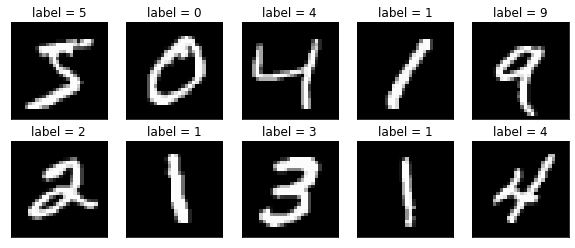

In [4]:
m = Mnist()
data = iter(m.loader_train).next()

fig = plt.figure(figsize=(10,4))

for i in range(10):
    x, y = data
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(x[i, 0], cmap="gray")
    ax.set_title(f"label = {y[i].item()}")
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

In [5]:
histories = {}
# Baseline
m = Mnist()
m.train()
histories["baseline"] = m.history

In [6]:
m = Mnist(width=16)
m.train()
histories["width16"] = m.history

In [7]:
m = Mnist(depth=4)
m.train()
histories["depth4"] = m.history

In [8]:
m = Mnist()
m.train(optimizer="SGD")
histories["sgd"] = m.history

In [9]:
m = Mnist()
m.train(lr=0.01)
histories["lr-2"] = m.history

In [10]:
m = Mnist(is_train_small=True)
m.train()
histories["small"] = m.history

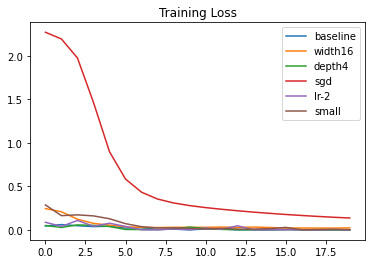

In [13]:
xs = range(m.n_epochs)

for key, history in histories.items():
    ys = history["loss_train"]
    plt.plot(xs, ys, label = key)

plt.title("Training Loss")
plt.legend()
plt.show()

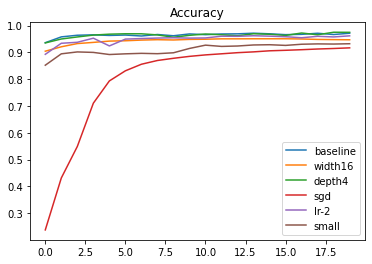

In [14]:
xs = range(m.n_epochs)

for key, history in histories.items():
    ys = history["acc_test"]
    plt.plot(xs, ys, label = key)

plt.title("Accuracy")
plt.legend()
plt.show()

## B.2 Overfitting
>Use Keras again, but this time on ImageNet. Now try different overfitting solutions.
>- Does the training speed change?
>- Does generalization change?
>- Now try the hold-out validation set. Do training and generalization change?

## B.3 Confidence
>How many runs did you do in the previous exercises, just a single run to see how long training took and how well generalization worked? Try to run it again.
>- Do you get the same results?
>- How large is the difference?
>- Can you change the random seeds of Keras or TensorFlow?
>- Can you calculate the confidence interval, how much does the confidence improve when you do 10 randomized runs? How about 100 runs? Make graphs with error bars

Make a confidence interval of the accuracy.
For the sake of time, set the width of hidden layers as 16 and the number of epochs as 5.

In [11]:
@jit(parallel=True)
def calc_ci(n=10):
    accuracies = np.zeros(n)

    for i in range(n):
        m = Mnist(width=16)
        m.train(n_epochs=5)
        accuracies[i] = m.history["acc_test"][-1]

    return accuracies

In [12]:
accuracies = calc_ci(n=100)

/tmp/ipykernel_5488/1384142884.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "calc_ci" failed type inference due to: Untyped global name 'Mnist': Cannot determine Numba type of <class 'type'>

File "../../../../tmp/ipykernel_5488/1384142884.py", line 6:
<source missing, REPL/exec in use?>

  @jit(parallel=True)
/tmp/ipykernel_5488/1384142884.py:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "calc_ci" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "../../../../tmp/ipykernel_5488/1384142884.py", line 5:
<source missing, REPL/exec in use?>

  @jit(parallel=True)
/opt/conda/lib/python3.9/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "calc_ci" was compiled in object mode without forceobj=True, but has lifted loops.

File "../../../../tmp/ipykernel_5488/1384142884.py", line 3:
<source

In [13]:
accuracies

array([0.9426, 0.938 , 0.9407, 0.9394, 0.9364, 0.9365, 0.9419, 0.9331,
       0.9308, 0.9375, 0.9401, 0.9456, 0.9468, 0.9394, 0.9459, 0.9384,
       0.937 , 0.9347, 0.9423, 0.9417, 0.9411, 0.9387, 0.9411, 0.945 ,
       0.9357, 0.9424, 0.9323, 0.9386, 0.9448, 0.9511, 0.9458, 0.9371,
       0.9427, 0.942 , 0.9461, 0.9325, 0.938 , 0.9387, 0.9384, 0.9391,
       0.9334, 0.9438, 0.947 , 0.9381, 0.9449, 0.9399, 0.9312, 0.9437,
       0.947 , 0.9382, 0.9351, 0.9439, 0.9422, 0.943 , 0.9441, 0.9434,
       0.9298, 0.9436, 0.9345, 0.9408, 0.9396, 0.9385, 0.9452, 0.939 ,
       0.9339, 0.9451, 0.9465, 0.9442, 0.9392, 0.9356, 0.9421, 0.9384,
       0.9364, 0.9396, 0.9373, 0.9427, 0.9399, 0.9343, 0.9371, 0.9412,
       0.928 , 0.9497, 0.9366, 0.9401, 0.939 , 0.9357, 0.9433, 0.9448,
       0.9411, 0.939 , 0.9412, 0.9439, 0.94  , 0.937 , 0.9409, 0.9444,
       0.9354, 0.9417, 0.9481, 0.949 ])

## B.4 GPU
>It might be that you have access to a GPU machine that is capable of running PyTorch or TensorFlow in parallel to speed up the training. Install the GPU version and check that it recognizes the GPU and is indeed using it.

## B.5 Paralelism
>It might be that you have access to a multicore CPU machine. When you are running multiple runs in order to improve confiedence, then an easy way to speed up your experiment is to spawn multiple jobs at the shell, assigning the output to different log files, and write a script to combine results and draw graphs. Write the scripts necessary to achieve this, test them, and do a large-confidence experiment.

Already used in B.3.

In [10]:
get_num_threads() # Num of the phisical cores are the half

12